# **Sunscreen Pricing Strategies on Tokopedia (July 2025): Skintific vs Somethinc**

## I. Introduction

### A. Background

In a highly competitive skincare market, sunscreen is one of the most competitive products because it is one of the must-have products to protect the skin from UV radiation. Around 51% of people in Indonesia use sunscreen due to the increase in weather temperature, and the number will keep increasing with the amount of awareness on how important it is to use sunscreen. With a progressive increase in awareness of the need to use sunscreen, the Indonesian sunscreen market will experience growth in the future. A lot of brands have their own Sunscreen such as Skintific and Somethinc. It is interesting to see how two of them are part of the top beauty brands in Indonesia on selling their products and competing with each other.

### B. Problem Statement

This project aims to analyse how skincare brands determine the pricing of their sunscreen products in a highly dynamic and competitive market. The analysis will focus on discount effectiveness, target audience, price range, and brand positioning. Through this approach, we aim to uncover how each brand positions itself, uncover its pricing strategies, how their competes, and give valuable insights for marketers and professionals in the beauty industry.

### C. Dataset Sources

My dataset source are by web-scraping Tokopedia website on July 2025.

## II. Data Loading and Preprocessing

### A. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

### B. Cleaning and Preprocessing

In [2]:
# create function for bundle column
def classification_bundle(name):
    name = str(name).lower()
    if 'bundle' in name:
        return 'Yes'
    elif 'paket' in name:
        return 'Yes'
    elif 'set' in name:
        return 'Yes'
    else:
        return 'No'

#### B1. Skintific Data

##### 1. Data cleaning

In [3]:
# import azarine data
data_skintific = pd.read_csv('data/skintific-raw.csv')
df_skintific = data_skintific.copy()

# display dataframe information
df_skintific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          793 non-null    object 
 1   price_after_discount  793 non-null    object 
 2   discount_percentage   793 non-null    object 
 3   merchant              771 non-null    object 
 4   merchant_city         771 non-null    object 
 5   unit_sold             793 non-null    object 
 6   product_rating        722 non-null    float64
dtypes: float64(1), object(6)
memory usage: 43.5+ KB


In [4]:
# create function for cleaning data
def cleaning_data(df):
    # lowercase product name and takes only sunscreen product
    df['product_name'] = df['product_name'].str.lower()
    df = df[df['product_name'].str.contains('sunscreen')]

    # drop duplicates data
    df = df.drop_duplicates()

    # remove '%' in discount_percentage column
    df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')

    # remove 'Rp' in price_after_discount column
    df['price_after_discount'] = df['price_after_discount'].str.replace('Rp', '')
    df['price_after_discount'] = df['price_after_discount'].str.replace('.', '')

    # remove 'terjual' word and '+' in unit_sold column
    df['unit_sold'] = df['unit_sold'].str.replace('terjual', '')
    df['unit_sold'] = df['unit_sold'].str.replace('+', '')
    df['unit_sold'] = df['unit_sold'].str.replace('rb', '')

    # change column datatype
    df['price_after_discount'] = df['price_after_discount'].astype('float64')
    df['discount_percentage'] = df['discount_percentage'].astype('int')
    df['unit_sold'] = df['unit_sold'].astype('int')

    return df

In [5]:
# apply function to data
df_skintific = cleaning_data(df_skintific)

# displaying data
df_skintific

,product_name,price_after_discount,discount_percentage,merchant,merchant_city,unit_sold,product_rating
9,￼[new launch] skintific - matte fit serum suns...,79600.0,60,Buyskincare,Kab. Sidoarjo,750,4.9
12,skintific vitamin c serum sunscreen spf50 pa++...,99138.0,18,Buyskincare,Kab. Sidoarjo,100,4.8
23,skintific 5x ceramide serum sunscreen sp50+ 80...,208226.0,4,CENTURY HEALTHCARE,Jakarta Pusat,100,5.0
25,skintific 5x ceramide serum sunscreen 5 ml / p...,41006.0,4,CENTURY HEALTHCARE,Jakarta Pusat,19,5.0
33,skintific outdoor sunscreen spray spf 50+ pa++...,147200.0,19,LOVELY BEAUTY SBY 76,Surabaya,7,5.0
...,...,...,...,...,...,...,...
771,skintific ceramide serum sunscreen 30ml - 437214,122455.0,5,Dan Dan Indonesia,Kab. Tangerang,1,NaN
772,skintific series moisturizer serum toner sunsc...,100100.0,33,Skinplaza,Jakarta Barat,1,NaN
780,[new] [kulit kusam] [video] skintific 2pcs cus...,253000.0,49,Skintificid,Jakarta Timur,1,NaN
786,[isnamarantika glowing 2pcs exclusive] skint...,188000.0,53,Skintificid,Jakarta Timur,6,NaN


##### 2. Handle missing value

In [6]:
# checking missing value
df_skintific.isnull().sum()

product_name             0
price_after_discount     0
discount_percentage      0
merchant                 0
merchant_city            0
unit_sold                0
product_rating          10
dtype: int64

Explanation:

The missing value is more than five percent of the data, so we need to check it first.

In [7]:
df_skintific

,product_name,price_after_discount,discount_percentage,merchant,merchant_city,unit_sold,product_rating
9,￼[new launch] skintific - matte fit serum suns...,79600.0,60,Buyskincare,Kab. Sidoarjo,750,4.9
12,skintific vitamin c serum sunscreen spf50 pa++...,99138.0,18,Buyskincare,Kab. Sidoarjo,100,4.8
23,skintific 5x ceramide serum sunscreen sp50+ 80...,208226.0,4,CENTURY HEALTHCARE,Jakarta Pusat,100,5.0
25,skintific 5x ceramide serum sunscreen 5 ml / p...,41006.0,4,CENTURY HEALTHCARE,Jakarta Pusat,19,5.0
33,skintific outdoor sunscreen spray spf 50+ pa++...,147200.0,19,LOVELY BEAUTY SBY 76,Surabaya,7,5.0
...,...,...,...,...,...,...,...
771,skintific ceramide serum sunscreen 30ml - 437214,122455.0,5,Dan Dan Indonesia,Kab. Tangerang,1,NaN
772,skintific series moisturizer serum toner sunsc...,100100.0,33,Skinplaza,Jakarta Barat,1,NaN
780,[new] [kulit kusam] [video] skintific 2pcs cus...,253000.0,49,Skintificid,Jakarta Timur,1,NaN
786,[isnamarantika glowing 2pcs exclusive] skint...,188000.0,53,Skintificid,Jakarta Timur,6,NaN


Explanation:

The missing values in the product rating column can be classified as MAR (Missing At Random) because they occur when customers choose not to leave a rating after purchasing the product. To handle these missing values, we can examine the distribution of the available ratings and consider imputing the missing ones using an appropriate method.

(4.5, 5.0)

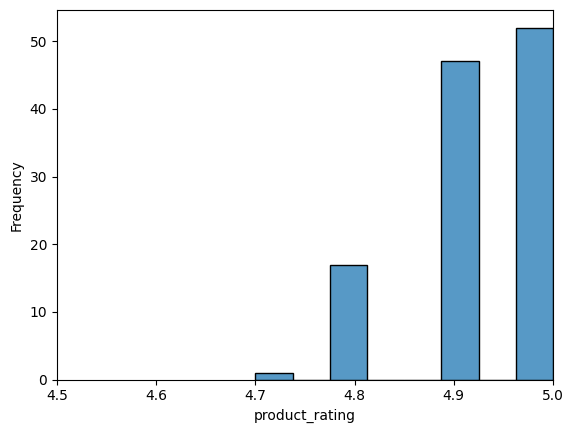

In [8]:
# check product rating distribution
sns.histplot(data=df_skintific, x='product_rating')
plt.ylabel('Frequency')
plt.xlim(4.5,5)

In [9]:
# we can impute the missing value with five stars, because most of the product have five stars rating

# impute missing value
values = {'product_rating': 5.0}
df_skintific = df_skintific.fillna(value=values)

# displaying data
df_skintific

,product_name,price_after_discount,discount_percentage,merchant,merchant_city,unit_sold,product_rating
9,￼[new launch] skintific - matte fit serum suns...,79600.0,60,Buyskincare,Kab. Sidoarjo,750,4.9
12,skintific vitamin c serum sunscreen spf50 pa++...,99138.0,18,Buyskincare,Kab. Sidoarjo,100,4.8
23,skintific 5x ceramide serum sunscreen sp50+ 80...,208226.0,4,CENTURY HEALTHCARE,Jakarta Pusat,100,5.0
25,skintific 5x ceramide serum sunscreen 5 ml / p...,41006.0,4,CENTURY HEALTHCARE,Jakarta Pusat,19,5.0
33,skintific outdoor sunscreen spray spf 50+ pa++...,147200.0,19,LOVELY BEAUTY SBY 76,Surabaya,7,5.0
...,...,...,...,...,...,...,...
771,skintific ceramide serum sunscreen 30ml - 437214,122455.0,5,Dan Dan Indonesia,Kab. Tangerang,1,5.0
772,skintific series moisturizer serum toner sunsc...,100100.0,33,Skinplaza,Jakarta Barat,1,5.0
780,[new] [kulit kusam] [video] skintific 2pcs cus...,253000.0,49,Skintificid,Jakarta Timur,1,5.0
786,[isnamarantika glowing 2pcs exclusive] skint...,188000.0,53,Skintificid,Jakarta Timur,6,5.0


##### 3. Add price before discount, category, brand, bundle, and merchant_type column

In [10]:
# add price before discount column and round it
df_skintific['price_before_discount'] =  df_skintific['price_after_discount'] / (1 - (df_skintific['discount_percentage']/100))
df_skintific = df_skintific.round({'price_before_discount': 0})

# add category column
df_skintific['category'] = 'Sunscreen'

# add brand column
df_skintific['brand'] = 'Skintific'

# add merchant type
# create list of merchant type
official_store = ['Skintific Official Store', 'Skintificid', ]
retail_store = ['Watsons Indonesia Official Store', 'Dan Dan Indonesia', 'Hypermart Cibubur Junc']

# apply function to create merchant type column
def category_store(item):
    if item in official_store:
        return 'Official Store'
    elif item in retail_store:
        return 'Retail'
    else:
        return 'Reseller'

df_skintific['merchant_type'] = df_skintific['merchant'].apply(category_store)

# apply function for bundle column
df_skintific['bundle'] = df_skintific['product_name'].apply(classification_bundle)

column_position = ['product_name', 'brand', 'category', 'merchant',
                  'merchant_city', 'merchant_type', 'bundle', 'price_before_discount', 
                  'price_after_discount', 'discount_percentage', 'unit_sold',
                  'product_rating']

# reposition column
df_skintific = df_skintific[column_position]
df_skintific


,product_name,brand,category,merchant,merchant_city,merchant_type,bundle,price_before_discount,price_after_discount,discount_percentage,unit_sold,product_rating
9,￼[new launch] skintific - matte fit serum suns...,Skintific,Sunscreen,Buyskincare,Kab. Sidoarjo,Reseller,No,199000.0,79600.0,60,750,4.9
12,skintific vitamin c serum sunscreen spf50 pa++...,Skintific,Sunscreen,Buyskincare,Kab. Sidoarjo,Reseller,No,120900.0,99138.0,18,100,4.8
23,skintific 5x ceramide serum sunscreen sp50+ 80...,Skintific,Sunscreen,CENTURY HEALTHCARE,Jakarta Pusat,Reseller,No,216902.0,208226.0,4,100,5.0
25,skintific 5x ceramide serum sunscreen 5 ml / p...,Skintific,Sunscreen,CENTURY HEALTHCARE,Jakarta Pusat,Reseller,No,42715.0,41006.0,4,19,5.0
33,skintific outdoor sunscreen spray spf 50+ pa++...,Skintific,Sunscreen,LOVELY BEAUTY SBY 76,Surabaya,Reseller,No,181728.0,147200.0,19,7,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
771,skintific ceramide serum sunscreen 30ml - 437214,Skintific,Sunscreen,Dan Dan Indonesia,Kab. Tangerang,Retail,No,128900.0,122455.0,5,1,5.0
772,skintific series moisturizer serum toner sunsc...,Skintific,Sunscreen,Skinplaza,Jakarta Barat,Reseller,No,149403.0,100100.0,33,1,5.0
780,[new] [kulit kusam] [video] skintific 2pcs cus...,Skintific,Sunscreen,Skintificid,Jakarta Timur,Official Store,No,496078.0,253000.0,49,1,5.0
786,[isnamarantika glowing 2pcs exclusive] skint...,Skintific,Sunscreen,Skintificid,Jakarta Timur,Official Store,Yes,400000.0,188000.0,53,6,5.0


In [11]:
# save data to csv
df_skintific.to_csv('data/skintific-clean.csv', index = False)

#### B2. Somethinc Data

##### 1. Data cleaning

In [12]:
# import data
data_somethinc = pd.read_csv('data/somethinc-raw.csv')
df_somethinc = data_somethinc.copy()

# display dataframe information
df_somethinc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          785 non-null    object 
 1   price_after_discount  785 non-null    object 
 2   discount_percentage   785 non-null    object 
 3   merchant              767 non-null    object 
 4   merchant_city         767 non-null    object 
 5   unit_sold             785 non-null    object 
 6   product_rating        665 non-null    float64
dtypes: float64(1), object(6)
memory usage: 43.1+ KB


In [13]:
# apply function to data
df_somethinc = cleaning_data(df_somethinc)

# displaying data
df_somethinc

,product_name,price_after_discount,discount_percentage,merchant,merchant_city,unit_sold,product_rating
8,[flash sale] somethinc holyshield! uv watery s...,49000.0,68,Somethinc,Tangerang,2,5.0
10,somethinc copy paste tinted sunscreen spf 40 p...,53000.0,21,BeautyHaul_NEW,Tangerang,10,5.0
30,somethinc copy paste tinted sunscreen spf 40 p...,53000.0,21,Somethinc Makeup Official,Tangerang,750,5.0
31,somethinc [3 pcs] basic skincare starter kit -...,201450.0,26,Somethinc,Tangerang,100,5.0
32,[flash sale] somethinc copy paste tinted sunsc...,169000.0,46,Somethinc,Tangerang,250,5.0
36,somethinc holyshield! uv watery sunscreen gel ...,110000.0,12,Elsbeauty,Kab. Sleman,100,5.0
40,somethinc copy paste tinted sunscreen spf 40 p...,95400.0,40,Health Fairy,Bandung,17,5.0
61,somethinc copy paste tinted sunscreen spf 40 p...,138330.0,13,Primrose Beauty Shop,Surabaya,100,5.0
82,somethinc holyshield no sebum mineral blur tra...,86130.0,13,Sakura Shop Surabaya,Surabaya,22,5.0
94,somethinc holyshield! sunscreen shake mist spf...,96000.0,20,Watsons Indonesia Official Store,Kab. Tangerang,30,5.0


##### 2. Handle missing value

In [14]:
# check missing value
df_somethinc.isnull().sum()

product_name            0
price_after_discount    0
discount_percentage     0
merchant                0
merchant_city           0
unit_sold               0
product_rating          5
dtype: int64

Explanation:

The missing value is more than five percent of the data. The missing values in the product rating column can be classified as MAR (Missing At Random) because they occur when customers choose not to leave a rating after purchasing the product. To handle these missing values, we can examine the distribution of the available ratings and consider imputing the missing ones using an appropriate method.

Text(0, 0.5, 'Frequency')

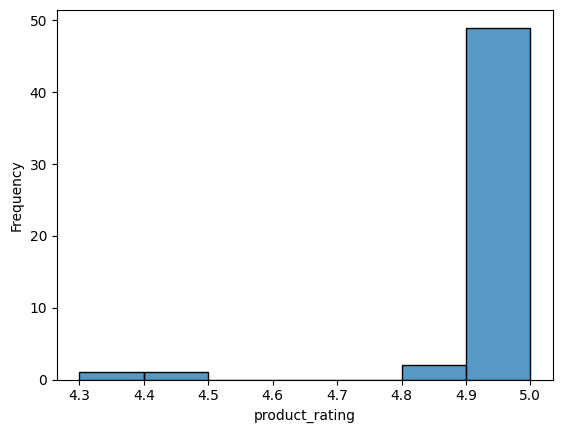

In [15]:
# check product rating distribution
sns.histplot(data=df_somethinc, x='product_rating')
plt.ylabel('Frequency')

In [16]:
# we can impute the missing value with five stars, because most of the product have five stars rating

# impute missing value
values = {'product_rating': 5.0}
df_somethinc = df_somethinc.fillna(value=values)

# displaying data
df_somethinc

,product_name,price_after_discount,discount_percentage,merchant,merchant_city,unit_sold,product_rating
8,[flash sale] somethinc holyshield! uv watery s...,49000.0,68,Somethinc,Tangerang,2,5.0
10,somethinc copy paste tinted sunscreen spf 40 p...,53000.0,21,BeautyHaul_NEW,Tangerang,10,5.0
30,somethinc copy paste tinted sunscreen spf 40 p...,53000.0,21,Somethinc Makeup Official,Tangerang,750,5.0
31,somethinc [3 pcs] basic skincare starter kit -...,201450.0,26,Somethinc,Tangerang,100,5.0
32,[flash sale] somethinc copy paste tinted sunsc...,169000.0,46,Somethinc,Tangerang,250,5.0
36,somethinc holyshield! uv watery sunscreen gel ...,110000.0,12,Elsbeauty,Kab. Sleman,100,5.0
40,somethinc copy paste tinted sunscreen spf 40 p...,95400.0,40,Health Fairy,Bandung,17,5.0
61,somethinc copy paste tinted sunscreen spf 40 p...,138330.0,13,Primrose Beauty Shop,Surabaya,100,5.0
82,somethinc holyshield no sebum mineral blur tra...,86130.0,13,Sakura Shop Surabaya,Surabaya,22,5.0
94,somethinc holyshield! sunscreen shake mist spf...,96000.0,20,Watsons Indonesia Official Store,Kab. Tangerang,30,5.0


##### 3. Add price before discount, category, brand, bundle, and merchant_type column

In [17]:
# add price before discount column and round it
df_somethinc['price_before_discount'] =  df_somethinc['price_after_discount'] / (1 - (df_somethinc['discount_percentage']/100))
df_somethinc = df_somethinc.round({'price_before_discount': 0})

# add category column
df_somethinc['category'] = 'Sunscreen'

# add brand column
df_somethinc['brand'] = 'Somethinc'

# add merchant type
# create list of merchant type
official_store = ['Skintific Official Store', 'Skintificid', ]
retail_store = ['Watsons Indonesia Official Store', 'Dan Dan Indonesia', 'Hypermart Cibubur Junc']

# apply function to create merchant type column
df_somethinc['merchant_type'] = df_somethinc['merchant'].apply(category_store)

# apply function for bundle column
df_somethinc['bundle'] = df_somethinc['product_name'].apply(classification_bundle)

column_position = ['product_name', 'brand', 'category', 'merchant',
                  'merchant_city', 'merchant_type', 'bundle', 'price_before_discount', 
                  'price_after_discount', 'discount_percentage', 'unit_sold',
                  'product_rating']

# reposition column
df_somethinc = df_somethinc[column_position]
df_somethinc


,product_name,brand,category,merchant,merchant_city,merchant_type,bundle,price_before_discount,price_after_discount,discount_percentage,unit_sold,product_rating
8,[flash sale] somethinc holyshield! uv watery s...,Somethinc,Sunscreen,Somethinc,Tangerang,Reseller,No,153125.0,49000.0,68,2,5.0
10,somethinc copy paste tinted sunscreen spf 40 p...,Somethinc,Sunscreen,BeautyHaul_NEW,Tangerang,Reseller,No,67089.0,53000.0,21,10,5.0
30,somethinc copy paste tinted sunscreen spf 40 p...,Somethinc,Sunscreen,Somethinc Makeup Official,Tangerang,Reseller,No,67089.0,53000.0,21,750,5.0
31,somethinc [3 pcs] basic skincare starter kit -...,Somethinc,Sunscreen,Somethinc,Tangerang,Reseller,No,272230.0,201450.0,26,100,5.0
32,[flash sale] somethinc copy paste tinted sunsc...,Somethinc,Sunscreen,Somethinc,Tangerang,Reseller,No,312963.0,169000.0,46,250,5.0
36,somethinc holyshield! uv watery sunscreen gel ...,Somethinc,Sunscreen,Elsbeauty,Kab. Sleman,Reseller,No,125000.0,110000.0,12,100,5.0
40,somethinc copy paste tinted sunscreen spf 40 p...,Somethinc,Sunscreen,Health Fairy,Bandung,Reseller,No,159000.0,95400.0,40,17,5.0
61,somethinc copy paste tinted sunscreen spf 40 p...,Somethinc,Sunscreen,Primrose Beauty Shop,Surabaya,Reseller,No,159000.0,138330.0,13,100,5.0
82,somethinc holyshield no sebum mineral blur tra...,Somethinc,Sunscreen,Sakura Shop Surabaya,Surabaya,Reseller,No,99000.0,86130.0,13,22,5.0
94,somethinc holyshield! sunscreen shake mist spf...,Somethinc,Sunscreen,Watsons Indonesia Official Store,Kab. Tangerang,Retail,No,120000.0,96000.0,20,30,5.0


In [18]:
# save data to csv
df_somethinc.to_csv('data/somethinc-clean.csv', index=False)

### C. Combining Data

In [19]:
# combineing data
df_combined = pd.concat([df_skintific, df_somethinc], ignore_index=True)

# save clean data to csv
df_combined.to_csv('data/data-clean.csv', index=False)

## III. Exploratory Data Analysis

In [20]:
# load data
df = pd.read_csv('data/data-clean.csv')
df

,product_name,brand,category,merchant,merchant_city,merchant_type,bundle,price_before_discount,price_after_discount,discount_percentage,unit_sold,product_rating
0,￼[new launch] skintific - matte fit serum suns...,Skintific,Sunscreen,Buyskincare,Kab. Sidoarjo,Reseller,No,199000.0,79600.0,60,750,4.9
1,skintific vitamin c serum sunscreen spf50 pa++...,Skintific,Sunscreen,Buyskincare,Kab. Sidoarjo,Reseller,No,120900.0,99138.0,18,100,4.8
2,skintific 5x ceramide serum sunscreen sp50+ 80...,Skintific,Sunscreen,CENTURY HEALTHCARE,Jakarta Pusat,Reseller,No,216902.0,208226.0,4,100,5.0
3,skintific 5x ceramide serum sunscreen 5 ml / p...,Skintific,Sunscreen,CENTURY HEALTHCARE,Jakarta Pusat,Reseller,No,42715.0,41006.0,4,19,5.0
4,skintific outdoor sunscreen spray spf 50+ pa++...,Skintific,Sunscreen,LOVELY BEAUTY SBY 76,Surabaya,Reseller,No,181728.0,147200.0,19,7,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
180,somethinc sunscreen series holyshield uv water...,Somethinc,Sunscreen,Skinplaza,Jakarta Barat,Reseller,No,149365.0,94100.0,37,2,5.0
181,somethinc holyshield sunscreen shake mist spf4...,Somethinc,Sunscreen,Dan Dan Indonesia,Kab. Tangerang,Retail,No,120000.0,114000.0,5,2,5.0
182,somethinc copy paste tinted sunscreen spf 40 p...,Somethinc,Sunscreen,Klik.Apotek,Kab. Tasikmalaya,Reseller,No,180460.0,157000.0,13,1,5.0
183,somethinc holyshield sunscreen comfort correct...,Somethinc,Sunscreen,Tanina 0fficial,Jakarta Barat,Reseller,No,199412.0,135600.0,32,1,5.0


### A. What brand has the most sold individual products?

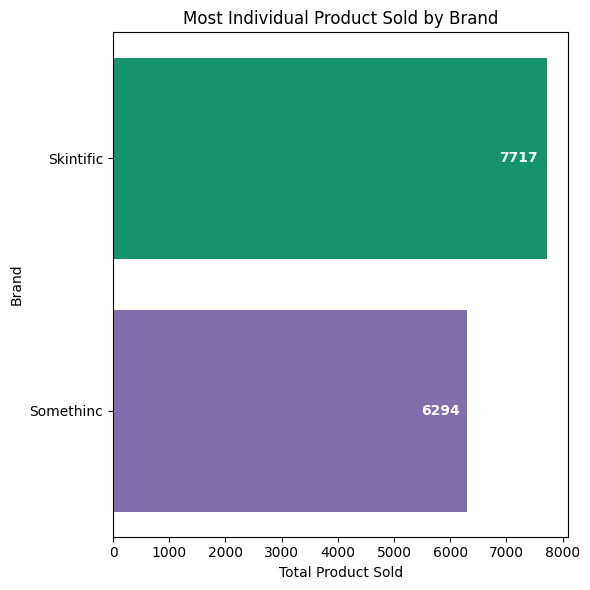

In [36]:
# create dummy dataframe
df_not_bundle = df[df['bundle'] == 'No']
df_a = df_not_bundle.groupby('brand')['unit_sold'].sum().reset_index()
df_a = df_a.rename(columns={'unit_sold': 'total_sold'})

# color palette per brand
palette = {'Skintific': '#00a974',
           'Somethinc': '#7d63b7'}

# horizontal bar chart
plt.figure(figsize=(6, 6))
barplot = sns.barplot(data=df_a, y='brand', x='total_sold', palette=palette)

# display number inside the bars
for p in barplot.patches:
    width = p.get_width()
    barplot.annotate(f'{width:.0f}',
                     (width - (width * 0.02), p.get_y() + p.get_height() / 2),
                     ha='right', va='center',
                     fontsize=10, fontweight='bold', color='white')

plt.xlabel('Total Product Sold')
plt.ylabel('Brand')
plt.title('Most Individual Product Sold by Brand')
plt.tight_layout()
plt.show()

Explanation:

From the bar chart above, we can see that Skintific has the most individual sunscreen products being sold compared to Somethinc on Tokopedia. Skintific and Somethinc have the same market, they want to reach customers in the middle to upper class customers, and the difference between them is not that big of a difference. It indicates that foreign and local brands have the same popularity on this market type.

### B. What brand has the largest average discount on Individual Product?

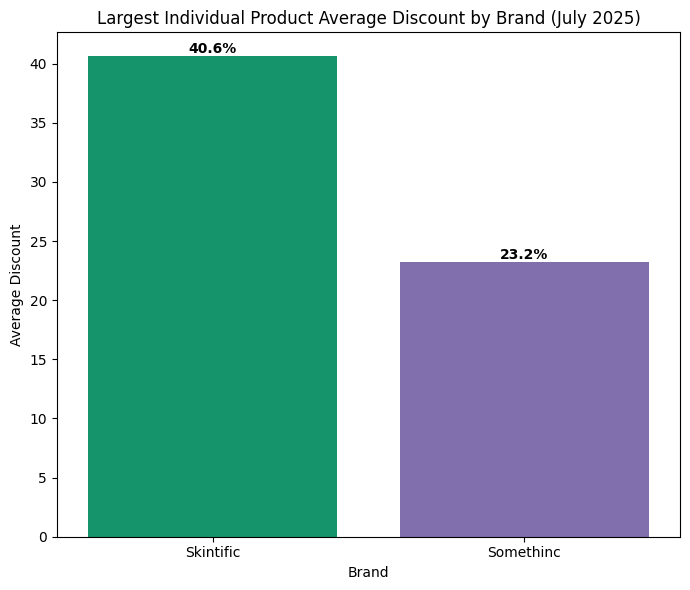

In [22]:
# create dummy dataframe
df_b = df_not_bundle.groupby('brand')['discount_percentage'].mean().reset_index()
df_b = df_b.rename(columns={'discount_percentage': 'average_discount'})

# color palette per brand
palette = palette = {'Skintific': '#00a974',
           'Somethinc': '#7d63b7'}

# visualisation using bar chart
plt.figure(figsize=(7, 6))
barplot = sns.barplot(data=df_b, x='brand', y='average_discount', palette=palette)

# display number on top of each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.1f}%',  # format to 1 decimal 
                     (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom',
                     fontsize=10, fontweight='bold')

plt.ylabel('Average Discount')
plt.xlabel('Brand')
plt.title('Largest Individual Product Average Discount by Brand (July 2025)')
plt.tight_layout()
plt.show()

Explanation:

From the bar chart above, we can see that Skintific has the highest average discount percentage of 40.6% compared to Somethinc on 23.2% in July 2025. We can see that Skintific set a high discount compared to Somethinc who put a lower discount. Usually, FMCG industries are characterised by having lower margin profit and prioritise sales volume, so adapting to demand fluctuations is important to attract and retain customers (Diego et al, 2024). We can conclude that Skintific is currently pushing their sales volume compared to Somethinc, because of their high average discount percentage. 

### C. How's the brand's customer satisfaction?

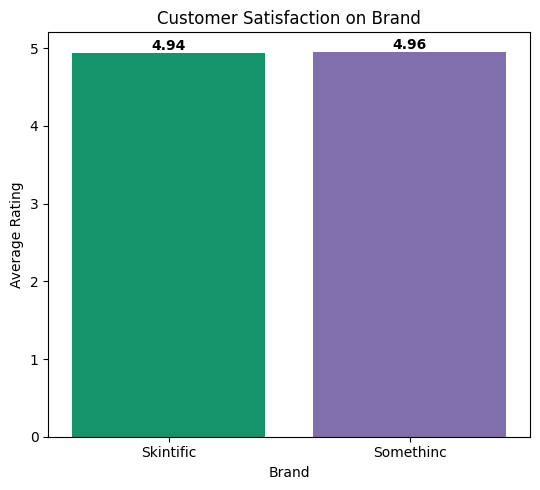

In [23]:
# create dummy dataframe
df_c= df_not_bundle.groupby('brand')['product_rating'].mean().reset_index()
df_c
# visualise it
plt.figure(figsize=(5.5,5))
palette = palette = {'Skintific': '#00a974',
           'Somethinc': '#7d63b7'}
barplot = sns.barplot(data=df_c, x='brand', y='product_rating', palette=palette)

# display number on top of each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}',  # format to 1 decimal 
                     (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom',
                     fontsize=10, fontweight='bold')

plt.ylabel('Average Rating')
plt.xlabel('Brand')
plt.title('Customer Satisfaction on Brand')
plt.tight_layout()
plt.show()

Explanation:

The bar chart above shows that Skintific and Somethinc almost have the same rating from their customers. It indicates that customers who buy their products are satisfied, and both of them have a great reputation in the skincare market.

### D. What brand have the highest average price before discount for Individual Product?

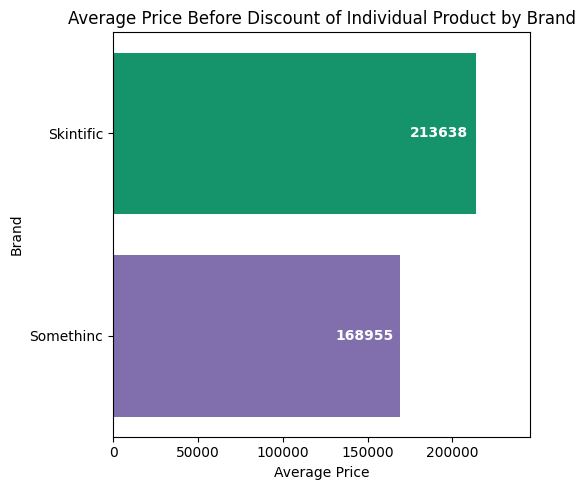

In [39]:
# create dummy dataframe
df_d = df_not_bundle.groupby('brand')['price_before_discount'].mean().reset_index()

# visualise it - horizontal bar chart
plt.figure(figsize=(5.5, 5))
palette = {'Skintific': '#00a974',
           'Somethinc': '#7d63b7'}

barplot = sns.barplot(data=df_d, y='brand', x='price_before_discount', palette=palette)

# display number inside the bars
for p in barplot.patches:
    width = p.get_width()
    barplot.annotate(f'{width:.0f}',  # format to 0 decimal
                     (width - (width * 0.02), p.get_y() + p.get_height() / 2),
                     ha='right', va='center',
                     fontsize=10, fontweight='bold', color='white')

# make x-axis wider for neat number placement
max_val = df_d['price_before_discount'].max()
plt.xlim(0, max_val * 1.15)  # adds 15% extra space

plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.title('Average Price Before Discount of Individual Product by Brand')
plt.tight_layout()
plt.show()

Explanation:

The bar chart above shows that Skintific sunscreen has a higher average price before discount compared to Somethinc. Despite targeting the same market, Skintific have a higher average price because their unique selling point is branded as "healthy skincare", since product safety is one of the most common pain points in this market. It is shown that most Skintific customers buy their products because of watching TikTok influencers who recommend them because of the products that make them have "healthy looking skin" (Virginia et al, 2024). This is why their customers are willing to pay the premium price.

From this, we know that it is important as a brand to market their products leaning more towards healthy sunscreen products, because the market itself is always concerned about the safety of the products. Customers are also willing to pay for the premium price, because most of people have a mindset of "there's a price, so there's quality".

### E. What brand have the highest average price after discount for individual product?

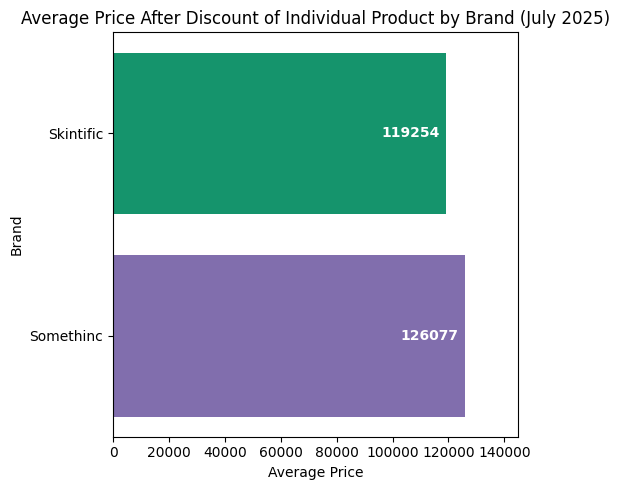

In [48]:
# create dummy dataframe
df_e = df_not_bundle.groupby('brand')['price_after_discount'].mean().reset_index()

# visualise it - horizontal bar chart
plt.figure(figsize=(5.5, 5))
palette = {'Skintific': '#00a974',
           'Somethinc': '#7d63b7'}

barplot = sns.barplot(data=df_e, y='brand', x='price_after_discount', palette=palette)

# display number inside the bars
for p in barplot.patches:
    width = p.get_width()
    barplot.annotate(f'{width:.0f}',  # format to 0 decimal
                     (width - (width * 0.02), p.get_y() + p.get_height() / 2),
                     ha='right', va='center',
                     fontsize=10, fontweight='bold', color='white')

# make x-axis wider for neat number placement
max_val = df_e['price_after_discount'].max()
plt.xlim(0, max_val * 1.15)  # adds 15% extra space

plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.title('Average Price After Discount of Individual Product by Brand (July 2025)')
plt.tight_layout()
plt.show()

Explanation:

The bar chart above shows that the average price after discount in July of Skintific is lower than Somethinc. From the bar chart of average discount percentage before, the average discount percentage for Skintific is 40.6%, which is a high discount percentage. We can prove more than that in July that Skintific is pushing their sunscreen sales volume, and it is shown by a high average discount percentage and average price after discount that is lower than Somethinc.

This pricing strategy is commonly used when a brand wants to increase its sales volumes to give its customers a high discount percentage and a bargain price. This strategy utilises customers perceived value, because customers will be encouraged to buy the products, especially when we look at the price differences between Skintific and Somethinc before the discount.

### F. Is there a significant difference of price before discount for individual products between Skintific and Somethinc?

In [26]:
# create dummy dataframe
df_f = df_not_bundle.copy()
df_f_skintific = df_f[df_f['brand'] == 'Skintific']
df_f_somethinc = df_f[df_f['brand'] == 'Somethinc']

# test it with t-statistic independent test
t_stat, p_val = stats.ttest_ind(df_f_skintific['price_before_discount'], df_f_somethinc['price_before_discount'])

# displaying p-value
print(f'P-value: {p_val:3f}')

P-value: 0.006127


**H0**: Distribution of price before discount of Skintific == Distribution of price before discount of Somethinc

**H1**: Distribution of price before discount of Skintific != Distribution of price before discount of Somethinc

Explanation:

We are conducting a T-test for independent samples to compare the means of price before discount between Skintific and Somethinc. From the test results, H0 is rejected, and there's a significant difference in price before discount between Skintific and Somethinc. These findings support the average sunscreen price before discount bar chart earlier that the large gap between Skintific and Somethinc is not only the averages, but also the distribution of the data.

### G. Is there a significant difference of discount percentage for individual products between Skintific and Somethinc?

In [27]:
# create dummy dataframe
df_g = df_not_bundle.copy()
df_g_skintific = df_g[df_g['brand'] == 'Skintific']
df_g_somethinc = df_g[df_g['brand'] == 'Somethinc']

# test it with t-statistic independent test
t_stat, p_val = stats.ttest_ind(df_g_skintific['discount_percentage'], df_g_somethinc['discount_percentage'])

# displaying p-value
print(f'P-value: {p_val:3f}')

P-value: 0.000000


**H0**: Distribution of discount percentages of Skintific == Distribution of discount percentages of Somethinc

**H1**: Distribution of discount percentages of Skintific != Distribution of discount percentages of Somethinc

Explanation:

We are conducting a T-test for independent samples to compare the discount percentage between Skintific and Somethinc. The test result shows that H0 is rejected and there's a significant difference in discount percentage between them. These findings support the average sunscreen discount percentages bar chart earlier that the large gap between Skintific and Somethinc is not only the averages, but also the distribution of the data.

### H. Does product rating influence price and discount?

In [28]:
# create dummy dataframe
df_h = df_not_bundle.copy()

# check distribuion type of price after discount (because we will use price after discount)
skew_price_h = df_h['price_after_discount'].skew()
skew_discount_h = df_h['discount_percentage'].skew()
skew_rating_h = df_h['product_rating'].skew()

# displaying value
print(f'Skewness value of price after discount: {skew_price_h:.2f}')
print(f'Skewness value of discount percentage: {skew_discount_h:.2f}')
print(f'Skewness value of product rating: {skew_rating_h:.2f}')

Skewness value of price after discount: 1.54
Skewness value of discount percentage: 0.25
Skewness value of product rating: -3.73


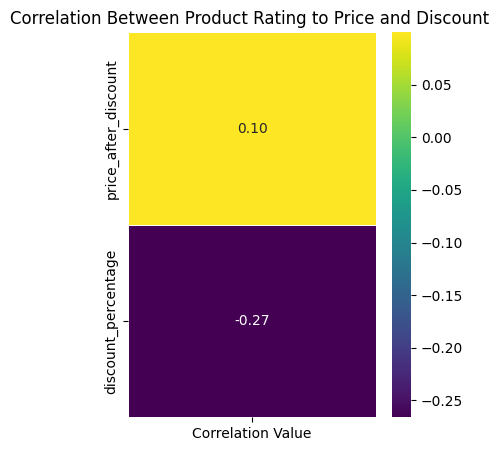

In [29]:
# check correlation between product rating to price_before discount and discount percentage
continous_col = ['price_after_discount', 'discount_percentage']
corr_dict = {}
for col in continous_col:
    corr, _ = stats.spearmanr(df_h['product_rating'], df_h[col])
    corr_dict[col] = corr

# convert to dataframe
corr_df = pd.DataFrame.from_dict(corr_dict, orient = 'index', columns = ['Correlation Value'])

# visualise it
plt.figure(figsize=(4,5))
sns.heatmap(corr_df, annot=True, 
            cmap='viridis', 
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Between Product Rating to Price and Discount ')
plt.show()

![Correlation-Table](images\Interpretation-of-Correlation-Coefficient.png)

Explanation:

From the heatmap above, we can see that the correlation value of product rating to price is 0.10 and to discount is -0.27. We are conducting a Spearman correlation test because the product rating distribution is skewed, despite the discount percentage distribution being normal. The test results show that there's a weak influence of product rating on discount and an even weaker influence on price. It is caused by both brands having a high satisfaction rating, indicating their products are trusted, and the pricing strategy of both products does not lead to a customers dissatisfaction.

### I. Does the price and discount of a product impact its sales volume?

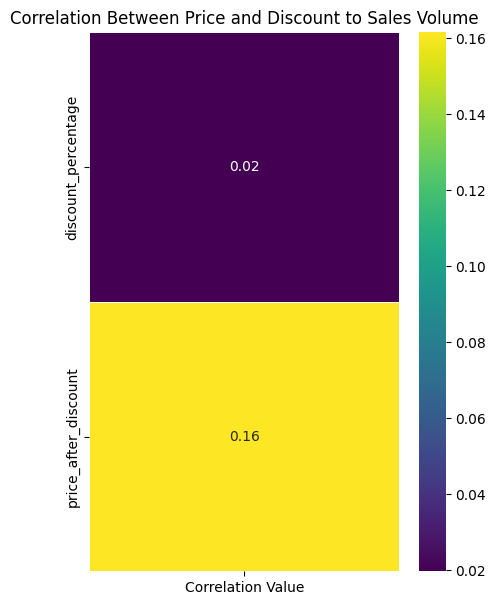

In [30]:
# check correlation between product rating to price_before discount and discount percentage
continous_col = ['discount_percentage', 'price_after_discount']
corr_dict = {}
for col in continous_col:
    corr, _ = stats.spearmanr(df_h[col], df_h['unit_sold'])
    corr_dict[col] = corr

# convert to dataframe
corr_df = pd.DataFrame.from_dict(corr_dict, orient = 'index', columns = ['Correlation Value'])

# visualise it
plt.figure(figsize=(5,7))
sns.heatmap(corr_df, annot=True, 
            cmap='viridis', 
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Between Price and Discount to Sales Volume')
plt.show()

![Correlation-Table](images\Interpretation-of-Correlation-Coefficient.png)

Explanation:

We use the Spearman correlation test to check the correlation between columns that have at least one column with a skew distribution. We can see from the heatmap above that discount and price have a very weak influence on sales volume based on correlation intepretation table. It means that whether the price is low or high, the price or the discount does not have an impact on sales volume, and the sales volume can be influenced by other factors such as customers perceived value of brands.

### J. How's the price range before and after discount?

Text(0.5, 1.0, 'Distribution of Somethinc Price (After Discount July 2025)')

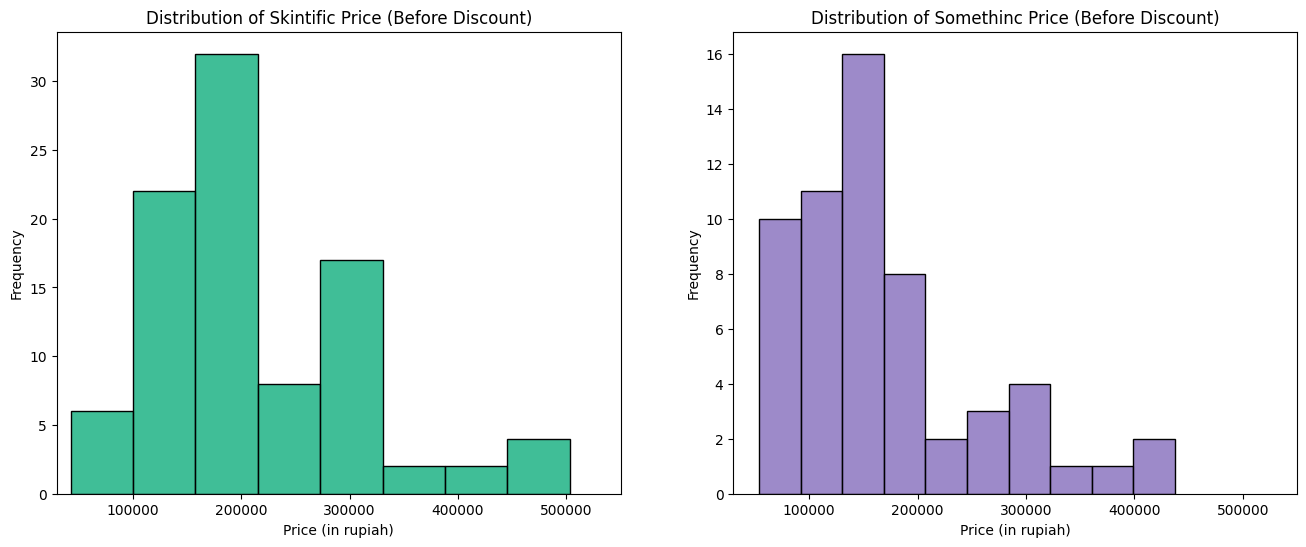

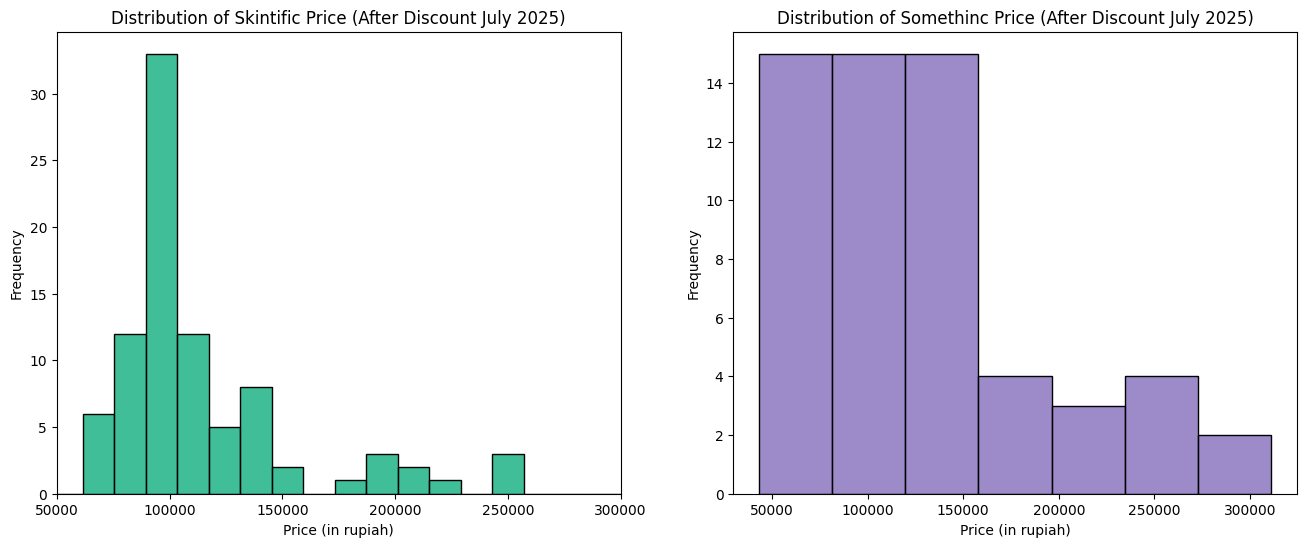

In [31]:
# create dummy dataaframe
df_j = df_not_bundle.copy()
df_j_skintific = df_j[df_j['brand'] == 'Skintific']
df_j_somethinc = df_j[df_j['brand'] == 'Somethinc']

# visualisation before discount
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
sns.histplot(data = df_j_skintific, x = 'price_before_discount', color='#00a974')
plt.ylabel('Frequency')
plt.xlabel('Price (in rupiah)')
plt.xlim(30_000,550_000)
plt.title('Distribution of Skintific Price (Before Discount)')

plt.subplot(1, 2, 2)
sns.histplot(data = df_j_somethinc, x = 'price_before_discount', color='#7d63b7')
plt.ylabel('Frequency')
plt.xlabel('Price (in rupiah)')
plt.xlim(30_000,550_000)
plt.title('Distribution of Somethinc Price (Before Discount)')

# visualisation after discount
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
sns.histplot(data = df_j_skintific, x = 'price_after_discount', color='#00a974')
plt.ylabel('Frequency')
plt.xlabel('Price (in rupiah)')
plt.xlim(50_000,300_000)
plt.title('Distribution of Skintific Price (After Discount July 2025)')

plt.subplot(1, 2, 2)
sns.histplot(data = df_j_somethinc, x = 'price_after_discount', color = '#7d63b7')
plt.ylabel('Frequency')
plt.xlabel('Price (in rupiah)')
plt.title('Distribution of Somethinc Price (After Discount July 2025)')

Explanation:

Based on the bar charts above, most Skintific sunscreen products have a pre-discount price ranging from Rp150,000 to Rp200,000, while the majority of Somethinc sunscreen products on Tokopedia fall between Rp130,000 to Rp160,000. After applying discounts, most Skintific sunscreen products on July in Tokopedia are priced between Rp80,000 to Rp110,000, whereas the majority of Somethinc sunscreen products on July are priced within the Rp50,000 to Rp150,000. 

The two brands have the majority of products priced in the same range after discount, which indicates that Skintific is applying a competition-based pricing model to compete with Somethinc. A brand that is perceived by customers as selling premium products usually using value-based pricing, but to push sales volume, Skintific changed its pricing model. This is a common practice to use and adapt to market conditions.

### K. How's the discount range for both products?

Text(0.5, 1.0, 'Distribution of Somethinc Discount (July 2025)')

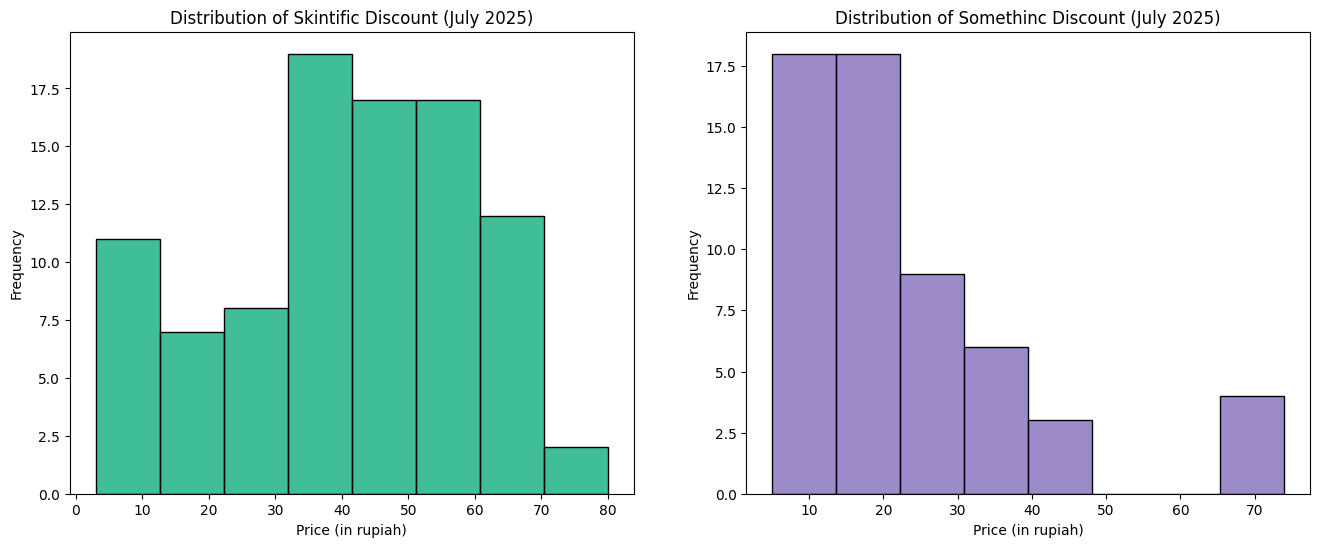

In [32]:
# create dummy dataaframe
df_k = df_not_bundle.copy()
df_k_skintific = df_k[df_k['brand'] == 'Skintific']
df_k_somethinc = df_k[df_k['brand'] == 'Somethinc']

# visualisation before discount
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
sns.histplot(data = df_k_skintific, x = 'discount_percentage', color='#00a974')
plt.ylabel('Frequency')
plt.xlabel('Price (in rupiah)')
plt.title('Distribution of Skintific Discount (July 2025)')

plt.subplot(1, 2, 2)
sns.histplot(data = df_k_somethinc, x = 'discount_percentage', color='#7d63b7')
plt.ylabel('Frequency')
plt.xlabel('Price (in rupiah)')
plt.title('Distribution of Somethinc Discount (July 2025)')

Explanation:

From the bar chart above, most Skintific sunscreen products discount on July 2025 range from 35% to 60%, while most of Somethinc sunscreen products discount on July 2025 range from 5% to 25%. These findings supported the previous explanation that Skintific is currently pushing their sales volume.

## IV. Conclusion and Recommendation

### A. Conclusion

Skintific and Somethinc have different brand awareness strategies. Skintific market themselves as "healthy skincare", while Somethinc always campaigns "Be you, Be Somethinc", which encourages you to be the best of yourself. Both brands receive positive reviews from customers based on product ratings on Tokopedia. Skintific and Somethinc have the same market, but the difference is that Skintific customers are willing to pay more for the premium price and have more sold products than Somethinc. It is caused by their brand awareness as a "healthy skincare" brand. It means that most customers are more interested in the brands that make their skin healthier. It is making Skintific adopt a value-based pricing model, and Somethinc is leaning more towards using a competition-based pricing model to compete with Skintific and other skincare products. It shows how brand awareness can influence the pricing model of a brand. 

We can also see how important it is to adapt the pricing model. In the case of July 2025, Skintific is giving many discounts on their sunscreen products to push their sales volume to improve profit margin, which can be a stock clearance strategy. Their average sunscreen price is even lower than the average price of Somethinc sunscreen products. This is a common practice, as we know that FMCG industries are characterised by having lower profit margins and high sales volume.

### B. Recommendation

As a data analyst and marketers in beauty industries, here's we can do to improve our skincare business and optimizing pricing strategy:
- Optimising business using competition-based pricing, by adapting brand awareness to include product safety, also promoting healthy skin. This can make the products stand out more and build loyalty through trust. Current markets value products that promote healthy skin.
- Use value-based pricing only if the products have a lot of loyal customers compared to others.
- Don't get stuck in one pricing strategy; use a dynamic pricing strategy based on the current market and brand images.
- Customer-perceived value is important to determine pricing strategy. Using KOLs that promote healthy skin can improve the customer perceived value in the current markets.
- Customer loyalty is also an important factor when determining a pricing strategy. Strengthening the emotional connection with customers can be achieved by creating educational content, not only on how to use skincare products properly, but also on topics such as healthy skin, overall wellness, and transparent product safety information.